In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


In [2]:
url2 = "https://corona.lmao.ninja/v2/historical/usacounties/florida?lastdays=all"

In [3]:
response2 = requests.get(url2).json()

In [4]:
response2

[{'province': 'florida',
  'county': 'alachua',
  'timeline': {'cases': {'1/22/20': 0,
    '1/23/20': 0,
    '1/24/20': 0,
    '1/25/20': 0,
    '1/26/20': 0,
    '1/27/20': 0,
    '1/28/20': 0,
    '1/29/20': 0,
    '1/30/20': 0,
    '1/31/20': 0,
    '2/1/20': 0,
    '2/2/20': 0,
    '2/3/20': 0,
    '2/4/20': 0,
    '2/5/20': 0,
    '2/6/20': 0,
    '2/7/20': 0,
    '2/8/20': 0,
    '2/9/20': 0,
    '2/10/20': 0,
    '2/11/20': 0,
    '2/12/20': 0,
    '2/13/20': 0,
    '2/14/20': 0,
    '2/15/20': 0,
    '2/16/20': 0,
    '2/17/20': 0,
    '2/18/20': 0,
    '2/19/20': 0,
    '2/20/20': 0,
    '2/21/20': 0,
    '2/22/20': 0,
    '2/23/20': 0,
    '2/24/20': 0,
    '2/25/20': 0,
    '2/26/20': 0,
    '2/27/20': 0,
    '2/28/20': 0,
    '2/29/20': 0,
    '3/1/20': 0,
    '3/2/20': 0,
    '3/3/20': 0,
    '3/4/20': 0,
    '3/5/20': 0,
    '3/6/20': 0,
    '3/7/20': 0,
    '3/8/20': 0,
    '3/9/20': 0,
    '3/10/20': 0,
    '3/11/20': 1,
    '3/12/20': 1,
    '3/13/20': 2,
    '3/14/20'

In [5]:
for xcounty in range(0,len(response2)):
    if response2[xcounty]["county"] == "miami-dade":
        miami_dade = response2[xcounty]

In [6]:
miami_dade_cases = miami_dade['timeline']['cases']
case_keys = miami_dade_cases.keys()
miami_dade_cases

{'1/22/20': 0,
 '1/23/20': 0,
 '1/24/20': 0,
 '1/25/20': 0,
 '1/26/20': 0,
 '1/27/20': 0,
 '1/28/20': 0,
 '1/29/20': 0,
 '1/30/20': 0,
 '1/31/20': 0,
 '2/1/20': 0,
 '2/2/20': 0,
 '2/3/20': 0,
 '2/4/20': 0,
 '2/5/20': 0,
 '2/6/20': 0,
 '2/7/20': 0,
 '2/8/20': 0,
 '2/9/20': 0,
 '2/10/20': 0,
 '2/11/20': 0,
 '2/12/20': 0,
 '2/13/20': 0,
 '2/14/20': 0,
 '2/15/20': 0,
 '2/16/20': 0,
 '2/17/20': 0,
 '2/18/20': 0,
 '2/19/20': 0,
 '2/20/20': 0,
 '2/21/20': 0,
 '2/22/20': 0,
 '2/23/20': 0,
 '2/24/20': 0,
 '2/25/20': 0,
 '2/26/20': 0,
 '2/27/20': 0,
 '2/28/20': 0,
 '2/29/20': 0,
 '3/1/20': 0,
 '3/2/20': 0,
 '3/3/20': 0,
 '3/4/20': 0,
 '3/5/20': 0,
 '3/6/20': 0,
 '3/7/20': 0,
 '3/8/20': 0,
 '3/9/20': 0,
 '3/10/20': 0,
 '3/11/20': 0,
 '3/12/20': 1,
 '3/13/20': 2,
 '3/14/20': 8,
 '3/15/20': 13,
 '3/16/20': 13,
 '3/17/20': 40,
 '3/18/20': 76,
 '3/19/20': 101,
 '3/20/20': 124,
 '3/21/20': 169,
 '3/22/20': 227,
 '3/23/20': 278,
 '3/24/20': 338,
 '3/25/20': 400,
 '3/26/20': 616,
 '3/27/20': 763,
 '3/28

In [7]:
date = []
cases = []
for x in case_keys:
    date.append(x)
    cases.append(miami_dade_cases[x])

In [8]:
case_summary={
    "Date": date,
    "Case Count": cases
}

Miami_case_count = pd.DataFrame(case_summary)

In [9]:
Miami_case_count["Case Count"] = Miami_case_count["Case Count"].astype(int)

In [15]:
Miami_case_count = Miami_case_count[Miami_case_count.index % 20 == 0]
dates_clean = Miami_case_count["Date"]

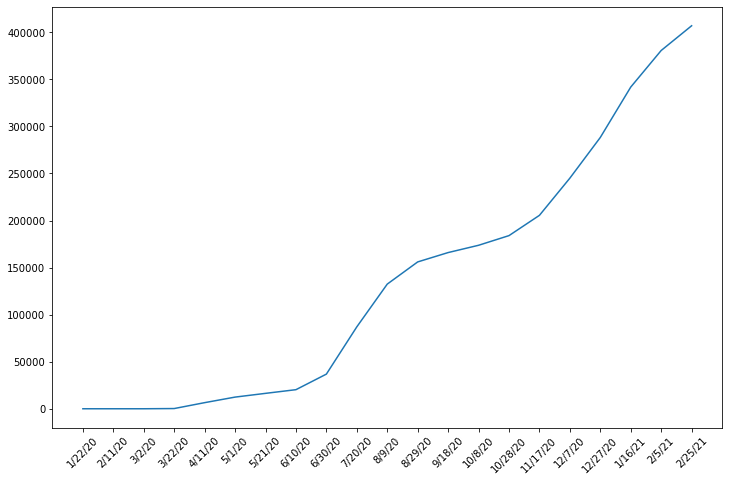

In [20]:
plt.figure(figsize=(12,7.75));
plt.plot(Miami_case_count["Date"],Miami_case_count["Case Count"]);
plt.xticks(rotation=45);